In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_style('ticks')

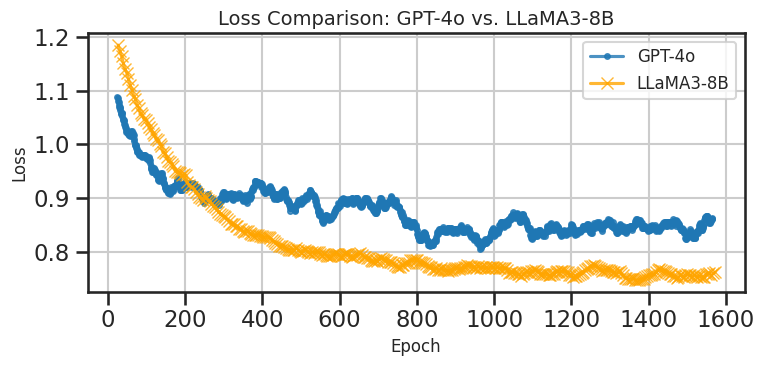

In [3]:

gpt_ft_loss = pd.read_csv('finetune/gpt_ft_loss.csv')
gpt_ft_loss['smoothed_loss'] = gpt_ft_loss['loss'].rolling(window=50, center=True).mean()

llama3_ft_loss = pd.read_csv('finetune/llama3_ft_loss.csv')
llama3_ft_loss['smoothed_loss'] = llama3_ft_loss['loss'].rolling(window=10, center=True).mean()

llama3_ft_loss_scaled = llama3_ft_loss.copy()
llama3_ft_loss_scaled['epoch'] = (
    llama3_ft_loss['epoch'] / llama3_ft_loss['epoch'].max()
) * gpt_ft_loss['epoch'].max()



plt.figure(figsize=(8, 4))
plt.plot(gpt_ft_loss['epoch'], gpt_ft_loss['smoothed_loss'], label='GPT-4o', marker='o', markersize=4, alpha=0.8)
plt.plot(llama3_ft_loss_scaled['epoch'], llama3_ft_loss_scaled['smoothed_loss'], label='LLaMA3-8B', marker='x', color='orange', alpha=0.8)
plt.title('Loss Comparison: GPT-4o vs. LLaMA3-8B', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/loss-comparison.pdf', bbox_inches='tight', transparent=True)
plt.show()


## confusion matrix

In [4]:
results_pth='./results/llama8b_ft_2d_fewshot_mode1_test_cut.csv'
llama_ft_fs_testset=pd.read_csv(results_pth)
llama_ft_fs_testset

,letter_gt,file_name,result,generated_answer
0,A,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/A/_2...,N,**Motion Analysis and Prediction**\n\nTo analy...
1,A,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/A/_2...,C,"To analyze the given accelerometer data, we be..."
2,A,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/A/_2...,A,**Motion Analysis and Prediction**\n\nThe prov...
3,A,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/A/_2...,J,"To analyze the given accelerometer data, we be..."
4,A,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/A/_2...,J,### Analysis of Accelerometer Data\n\nTo under...
...,...,...,...,...
256,Z,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/Z/_2...,H,### Analysis of Accelerometer Data\n\nTo under...
257,Z,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/Z/_2...,K,### Analysis of Accelerometer Data\n\nTo under...
258,Z,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/Z/_2...,L,### Analysis of Accelerometer Data\n\nTo under...
259,Z,./llama8b_ft_2d_fewshot/2d/mode1_test_cut/Z/_2...,B,### Analysis of Accelerometer Data\n\nTo under...


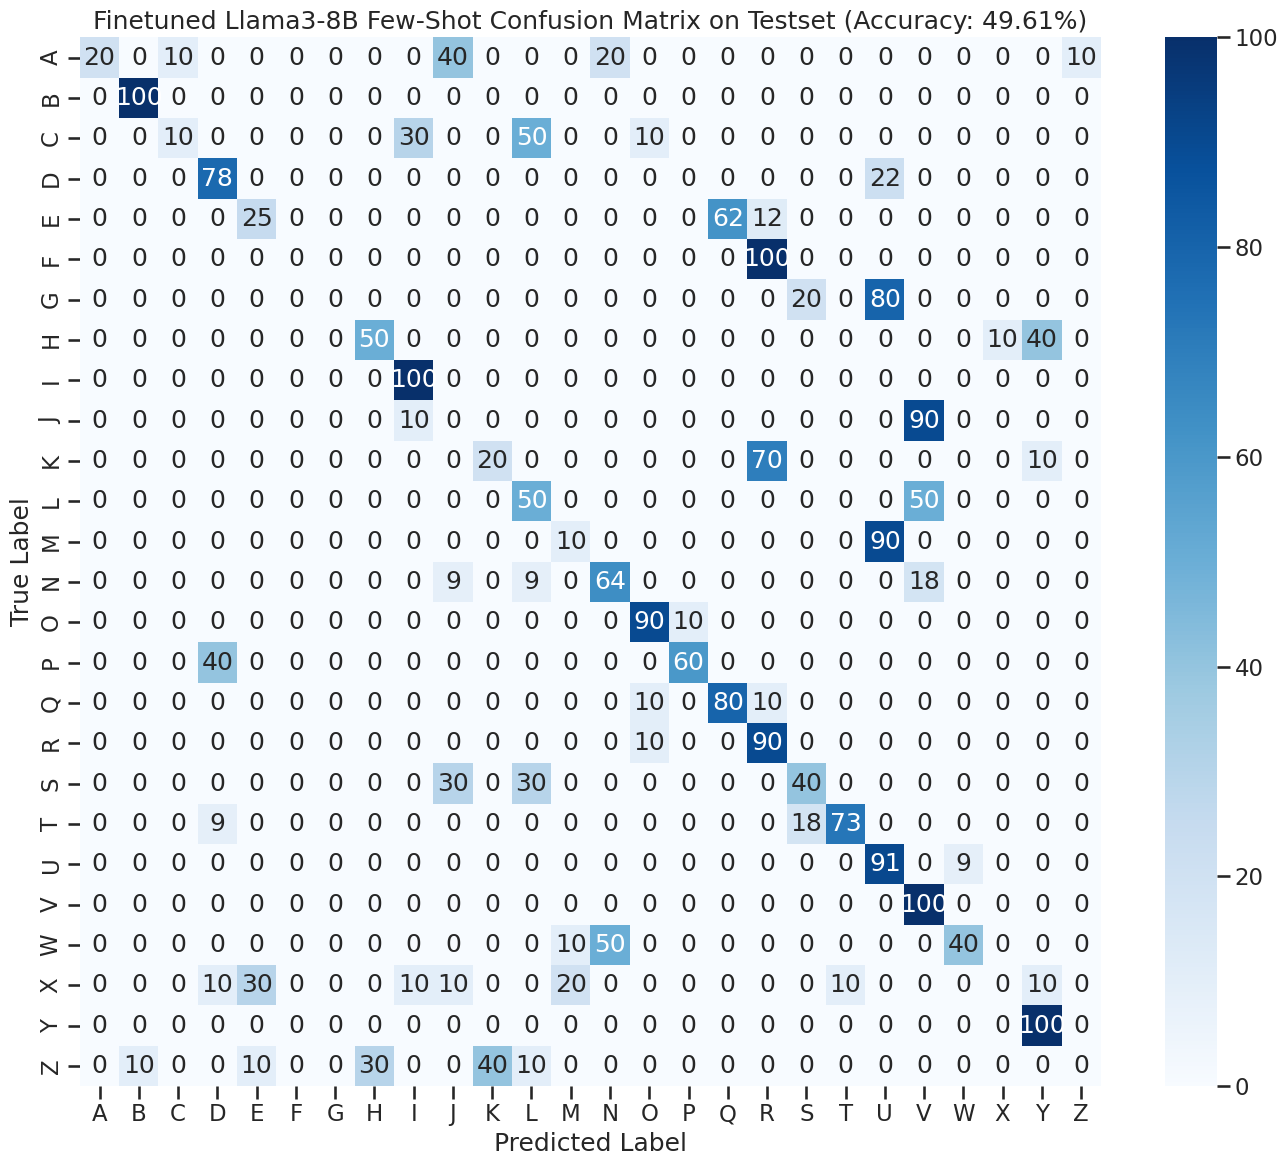

In [5]:
filtered_data = llama_ft_fs_testset[llama_ft_fs_testset['result'] != 'None']
filtered_data['letter_gt'] = filtered_data['letter_gt'].astype(str)
filtered_data['result'] = filtered_data['result'].astype(str)

ground_truth = filtered_data['letter_gt']
predicted = filtered_data['result']

labels = sorted(set(ground_truth))
cm = confusion_matrix(ground_truth, predicted, labels=labels)
cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percentage = np.nan_to_num(cm_percentage, nan=0.0)
cm_percentage_int = np.rint(cm_percentage).astype(int)

accuracy = np.trace(cm) / np.sum(cm) * 100

plt.figure(figsize=(14, 12))
sns.heatmap(cm_percentage_int, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=True)
plt.title(f"Finetuned Llama3-8B Few-Shot Confusion Matrix on Testset (Accuracy: {accuracy:.2f}%)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/confusion_matrix-testset.pdf', bbox_inches='tight', transparent=True)
plt.show()

/tmp/ipykernel_2785071/2466722764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['letter_gt'] = filtered_data['letter_gt'].astype(str)
/tmp/ipykernel_2785071/2466722764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['result'] = filtered_data['result'].astype(str)


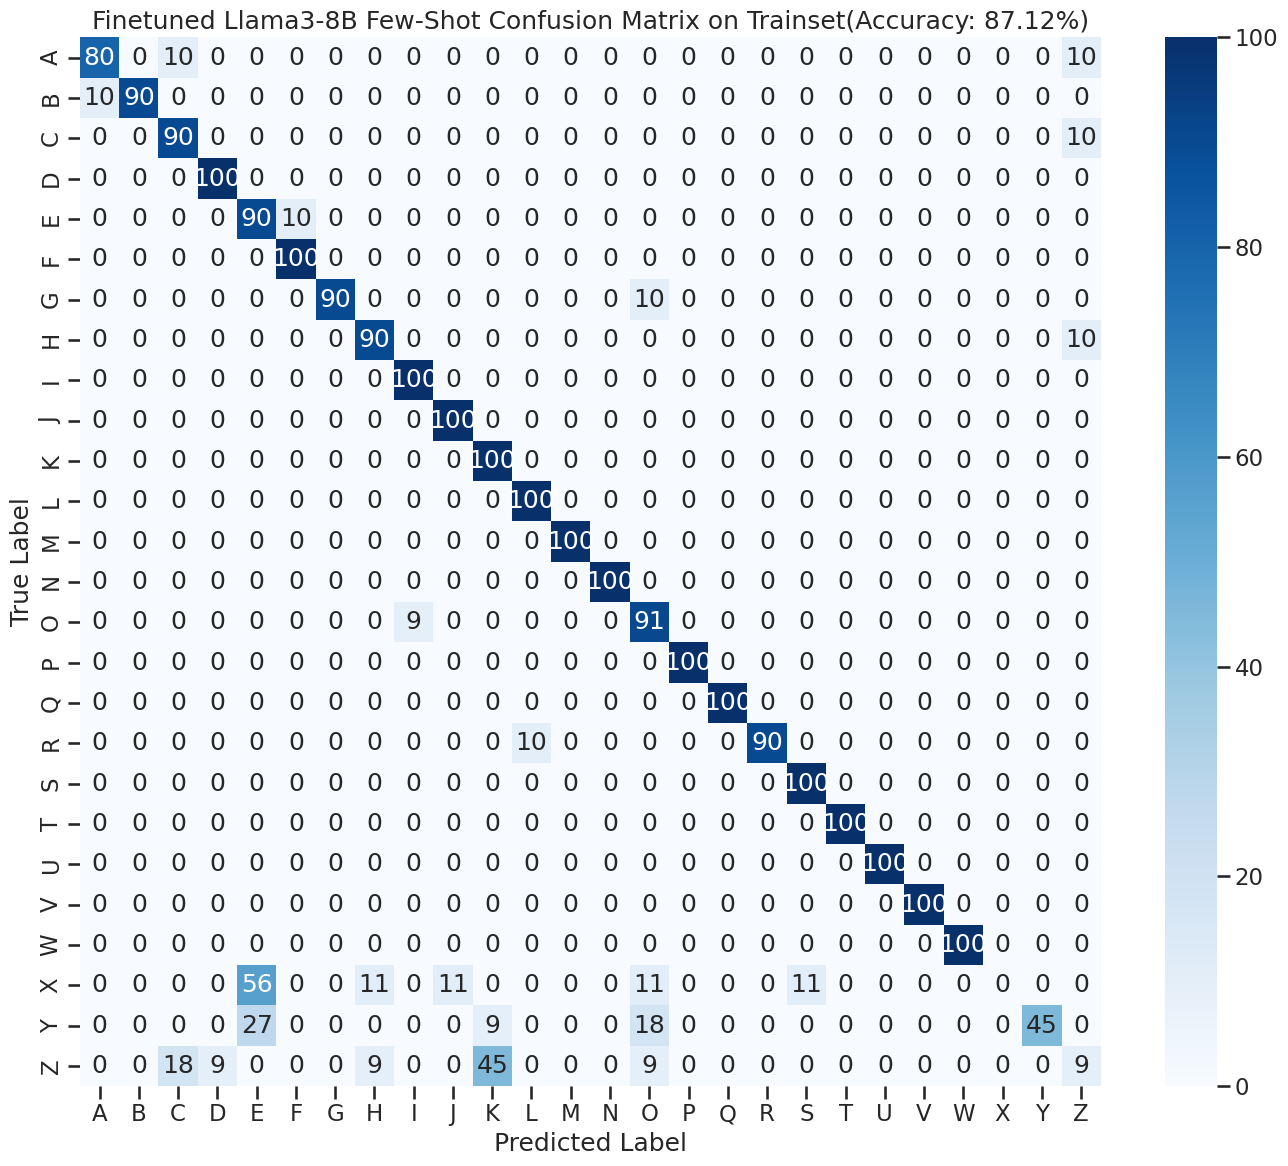

In [6]:
results_pth='./results/llama8b_ft_2d_fewshot_mode1_cut.csv'
llama_ft_fs_trainset=pd.read_csv(results_pth)
filtered_data = llama_ft_fs_trainset[llama_ft_fs_trainset['result'] != 'None']
filtered_data = llama_ft_fs_trainset[llama_ft_fs_trainset['result'] != 'result']

filtered_data['letter_gt'] = filtered_data['letter_gt'].astype(str)
filtered_data['result'] = filtered_data['result'].astype(str)

ground_truth = filtered_data['letter_gt']
predicted = filtered_data['result']

labels = sorted(set(ground_truth))
cm = confusion_matrix(ground_truth, predicted, labels=labels)
cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100
cm_percentage = np.nan_to_num(cm_percentage, nan=0.0)
cm_percentage_int = np.rint(cm_percentage).astype(int)

accuracy = np.trace(cm) / np.sum(cm) * 100

plt.figure(figsize=(14, 12))
sns.heatmap(cm_percentage_int, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=True)
plt.title(f"Finetuned Llama3-8B Few-Shot Confusion Matrix on Trainset(Accuracy: {accuracy:.2f}%)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/confusion_matrix-trainset.pdf', bbox_inches='tight', transparent=True)
plt.show()

## context eval

In [7]:
context_result = pd.read_csv('results/context/results.csv')

In [8]:
context_result

,word_len,word,num_samples,response_text
0,3,man,2,man
1,3,man,3,man
2,3,man,4,man
3,3,man,5,man
4,3,fun,2,fun
...,...,...,...,...
2823,6,resist,5,resit
2824,6,course,2,course
2825,6,course,3,course
2826,6,course,4,course


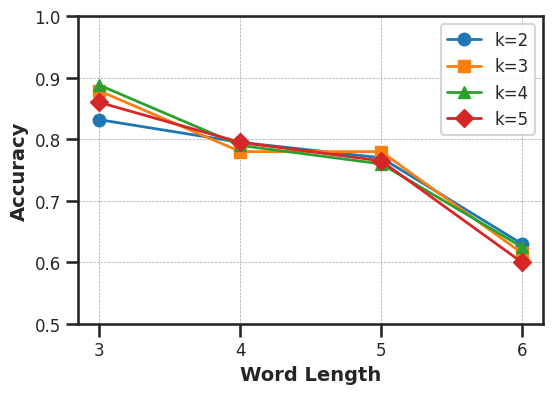

In [9]:
context_result['is_correct'] = context_result.apply(lambda row: row['word'] in row['response_text'], axis=1)

accuracy_data = context_result.groupby(['word_len', 'num_samples'])['is_correct'].mean().reset_index()

pivot_data = accuracy_data.pivot(index='word_len', columns='num_samples', values='is_correct')

plt.figure(figsize=(6, 4))  
markers = ['o', 's', '^', 'D', '*'] 
for idx, num_samples in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[num_samples], 
             label=f'k={num_samples}', 
             marker=markers[idx % len(markers)], 
             linestyle='-', linewidth=2)

plt.xlabel('Word Length', fontsize=14, weight='bold')
plt.ylabel('Accuracy', fontsize=14, weight='bold')

plt.xticks(pivot_data.index, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0.5,1.0])

plt.legend(title='', fontsize=12, title_fontsize=14, loc='best')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig('figures/context_eval.pdf', bbox_inches='tight', transparent=True)

plt.show()
